# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2,1e-3,1e-4]
Optimizer = ["SGD","RMSprop","AdaGrad","Adam"]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.9

In [7]:
results = {}
for opti in Optimizer:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("{0} with learning rate {1}".format(opti, str(lr)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if(opti == "SGD"):
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        elif(opti == "RMSprop"):
            optimizer = keras.optimizers.RMSprop(lr=lr, epsilon=None, decay=0.0)
        elif(opti == "AdaGrad"):      
            optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0) 
        elif(opti == "Adam"):      
            optimizer = keras.optimizers.Adam(lr=lr)
              
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "{0} with learning rate {1}".format(opti, str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0809 21:34:57.524347  4860 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0809 21:34:57.527347  4860 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0809 21:34:57.550348  4860 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 21:34:57.552348  4860 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 21:34:57.555348  4860 deprecation_wrapper.py:119] From C:\Anaconda3\li

SGD with learning rate 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================]

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 142us/step - loss: 2.0798 - acc: 0.2527 - val_loss: 1.9353 - val_acc: 0.3112
Epoch 2/20
50000/50000 [==============================] - 7s 142us/step - loss: 1.8740 - acc: 0.3391 - val_loss: 1.8336 - val_acc: 0.3565
Epoch 3/20
50000/50000 [==============================] - 7s 137us/step - loss: 1.8016 - acc: 0.3674 - val_loss: 1.7780 - val_acc: 0.3696
Epoch 4/20
50000/50000 [==============================] - 7s 136us/step - loss: 1.7534 - acc: 0.3848 - val_loss: 1.7311 - val_acc: 0.3986
Epoch 5/20
50000/50000 [==============================] - 7s 131us/step - loss: 1.7135 - acc: 0.4001 - val_loss: 1.6972 - val_acc: 0.4027
Epoch 6/20
50000/50000 [==============================] - 7s 134us/step - loss: 1.6812 - acc: 0.4114 - val_loss: 1.6673 - val_acc: 0.4160
Epoch 7/20
50000/50000 [==============================] - 7s 131us/step - loss: 1.6539 - acc: 0.4201 - val_loss: 1.6418 - 

50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
50000/50000 [==============================] - 8s 163us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/20
50000/50000 [==============================] - 8s 161us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/20
50000/50000 [=====

50000/50000 [==============================] - 9s 178us/step - loss: 1.5700 - acc: 0.4400 - val_loss: 1.6062 - val_acc: 0.4241
Epoch 8/20
50000/50000 [==============================] - 9s 188us/step - loss: 1.5339 - acc: 0.4548 - val_loss: 1.7921 - val_acc: 0.3758
Epoch 9/20
50000/50000 [==============================] - 9s 177us/step - loss: 1.5059 - acc: 0.4624 - val_loss: 1.7694 - val_acc: 0.3895
Epoch 10/20
50000/50000 [==============================] - 9s 183us/step - loss: 1.4728 - acc: 0.4756 - val_loss: 1.5401 - val_acc: 0.4504
Epoch 11/20
50000/50000 [==============================] - 9s 177us/step - loss: 1.4435 - acc: 0.4872 - val_loss: 1.5986 - val_acc: 0.4329
Epoch 12/20
50000/50000 [==============================] - 9s 179us/step - loss: 1.4235 - acc: 0.4941 - val_loss: 1.5343 - val_acc: 0.4664
Epoch 13/20
50000/50000 [==============================] - 9s 181us/step - loss: 1.3906 - acc: 0.5048 - val_loss: 1.6027 - val_acc: 0.4348
Epoch 14/20
50000/50000 [================

50000/50000 [==============================] - 7s 149us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/20
50000/50000 [==============================] - 7s 149us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/20
50000/50000 [==============================] - 7s 150us/step - loss: 14.5062 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/20
50000/50000 [==============================] - 7s 149us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/20
50000/50000 [==============================] - 7s 149us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/20
50000/50000 [==============================] - 7s 149us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/20
50000/50000 [==============================] - 8s 151us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/20
50000/50000 [

Epoch 13/20
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/20
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/20
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/20
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/20
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/20
50000/50000 [==============================] - 7s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/20
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
5

Epoch 16/20
50000/50000 [==============================] - 10s 209us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/20
50000/50000 [==============================] - 10s 207us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/20
50000/50000 [==============================] - 10s 208us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/20
50000/50000 [==============================] - 10s 208us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
50000/50000 [==============================] - 11s 210us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Adam with learning rate 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________________________________________________________

Epoch 19/20
50000/50000 [==============================] - 10s 195us/step - loss: 1.1394 - acc: 0.5941 - val_loss: 1.3748 - val_acc: 0.5203
Epoch 20/20
50000/50000 [==============================] - 10s 195us/step - loss: 1.1183 - acc: 0.6039 - val_loss: 1.3544 - val_acc: 0.5282
Adam with learning rate 0.0001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               

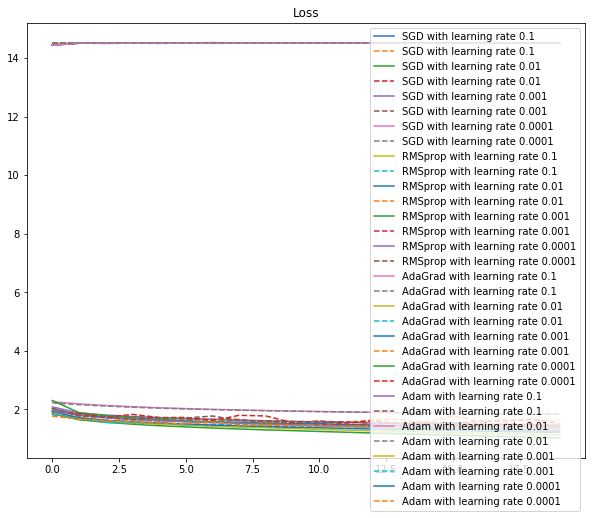

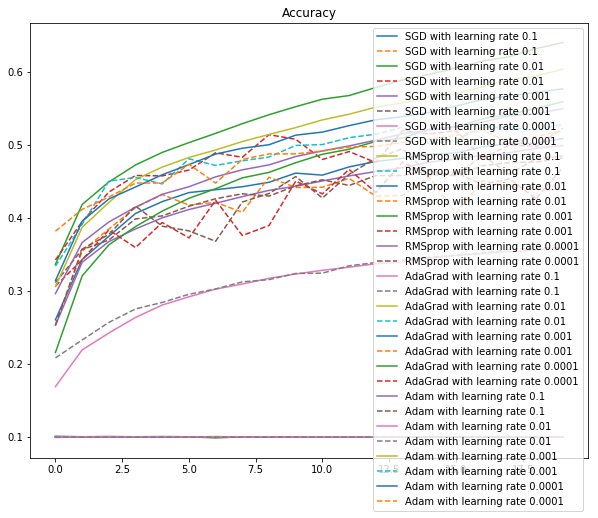

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()